In [1]:

import importlib.util
import sys
from google.colab import drive

drive.mount('/content/gdrive')

# To add a directory with your code into a list of directories 
# which will be searched for packages


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#path to custom dataloader
sys.path.append('/content/gdrive/My Drive/hw2/code/')
import data_loader


In [0]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchvision import transforms
from torch.nn import functional as F
import torch.optim as optim
import torch.utils.data as data_utils
from data_loader import get_dataset
import torch.optim as optim
from torch.optim import Adam, SGD, LBFGS
import numpy as np

In [0]:
batch_size = 256
num_epochs = 10
max_iters  = 1000
print_iter = 25 # Prints results every n iterations
conv_shapes = [[1,64,128]] #

# Model parameters
input_dim = 128
embed_dim = 64
num_labels = 26
cuda = torch.cuda.is_available()

In [0]:
#gettinig data using DataLoader class , modified code
dataset = get_dataset()

#word accuracies function based on letters, required dataset.nextletter info
def wordaccuracies(pred,actual):
  incorrectwords = 0
  totalwords = 0
  flag = True

  for i in range(len(testpredictedletters)):

    if pred[i] != actual[i]:
      flag= False
    if dataset.nextletter[split+i] == -1:
      if flag == False:
        incorrectwords+=1
        flag  = True
      totalwords = totalwords+1

  wordaccuracy = 1 - incorrectwords/totalwords
  print("Word accuracy: ", wordaccuracy)
  return wordaccuracy
  print("\n")


In [0]:
#leNet architecture
import torch.nn as nn
import torch.nn.functional as F

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 3, 3,padding=1)
        self.conv2 = nn.Conv2d(3, 3, 3,padding=1)
        self.fc1   = nn.Linear(24, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 26)

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.conv2(out))
        out = F.max_pool2d(out, 2)
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

In [0]:
#model, loss, optimizers
lenetmodel =  LeNet()
criterion = nn.CrossEntropyLoss()
optim = Adam(lenetmodel.parameters())


In [0]:
#testing function
def testingmodel():
    finalletteracc= 0 
    testpredictedletters,testactualletters=[],[]
    for i_batch, sample in enumerate(test_loader):
            
    #       print("Batch=", i_batch)
            test_X = sample[0]
            test_Y = sample[1]
    #       print(len(test_X))

            lastflag = (len(test_X)<256)
            if lastflag:
              test_X= test_X.view(len(test_X),1,16,8)
              test_X= test_X.repeat(1,3,1,1)
              test_Y = test_Y.view(len(train_Y),26)
            else:
              test_X= test_X.view(256,1,16,8)
              test_X= test_X.repeat(1,3,1,1)
              test_Y = test_Y.view(256,26)
            
            
            if cuda:
                test_X = test_X.cuda()
                test_Y = test_Y.cuda()
            labels=  torch.max(test_Y, 1)[1]

            outputs = lenetmodel(test_X)
            loss = criterion(outputs,labels)

            running_loss = 0.0
            running_corrects = 0
            _, preds = torch.max(outputs, 1)
            testactualletters.extend(labels.tolist())
            testpredictedletters.extend(preds.tolist())
            running_loss += loss.item() * test_X.size(0)
            running_corrects += torch.sum(preds == (labels.data))
            
            epoch_loss = running_loss / len(test_Y)
            epoch_acc = running_corrects.double() / len(test_Y)
            finalletteracc = finalletteracc + len(test_Y)*epoch_acc
            #print("Letter accuracy =",epoch_acc)

    wtestingepoc.append(wordaccuracies(testpredictedletters,testactualletters))
    testingepoc.append(finalletteracc/len(test))
    print("Testing acc = :",finalletteracc/len(test) )

In [110]:
#training and 
dataset = get_dataset()
trainingepoc,testingepoc=[],[]
wtrainingepoc,wtestingepoc=[],[]
split = int(0.5 * len(dataset.data)) # train-test split
train_data, test_data = dataset.data[:split], dataset.data[split:]
train_target, test_target = dataset.target[:split], dataset.target[split:]
    # Convert dataset into torch tensors
train = data_utils.TensorDataset(torch.tensor(train_data).float(), torch.tensor(train_target).long())
test = data_utils.TensorDataset(torch.tensor(test_data).float(), torch.tensor(test_target).long())

# Define train and test loaders
train_loader = data_utils.DataLoader(train,  # dataset to load from
                                         batch_size=batch_size,  # examples per batch (default: 1)
                                         shuffle=True,
                                         sampler=None,  # if a sampling method is specified, `shuffle` must be False
                                         num_workers=5,  # subprocesses to use for sampling
                                         pin_memory=False,  # whether to return an item pinned to GPU
                                         )

test_loader = data_utils.DataLoader(test,  # dataset to load from
                                        batch_size=batch_size,  # examples per batch (default: 1)
                                        shuffle=False,
                                        sampler=None,  # if a sampling method is specified, `shuffle` must be False
                                        num_workers=5,  # subprocesses to use for sampling
                                        pin_memory=False,  # whether to return an item pinned to GPU
                                        )

    
for i in range(50):
    trainpredictedletters,trainactualletters=[],[]
    trainingacc= 0
    if i%1==0:
          print("\n  Processing epoch {}".format(i))
    
 #   print('Loaded dataset... ')

    # Now start training
    for i_batch, sample in enumerate(train_loader):
        if i_batch%25==0:
          print("Batch=", i_batch)
        train_X = sample[0]
        train_Y = sample[1]

        lastflag = (len(train_X)<256)
        if lastflag:
          train_X= train_X.view(len(train_X),1,16,8)
          train_X= train_X.repeat(1,3,1,1)
          train_Y = train_Y.view(len(train_Y),26)
        else:
          train_X= train_X.view(256,1,16,8)
          train_X= train_X.repeat(1,3,1,1)
          train_Y = train_Y.view(256,26)
        
        if cuda:
            train_X = train_X.cuda()
            train_Y = train_Y.cuda()
        
        labels=  torch.max(train_Y, 1)[1]

        
        

        running_loss = 0.0
        running_corrects = 0

        optim.zero_grad()
        outputs = lenetmodel(train_X)
        loss = criterion(outputs, labels)
        loss.backward()


        optim.step()

        outputs = lenetmodel(train_X)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs, 1)

        
        trainactualletters.extend(labels.tolist())
        trainpredictedletters.extend(preds.tolist())
        
        running_loss += loss.item() * train_X.size(0)
        running_corrects += torch.sum(preds == (labels).data)

        epoch_loss = running_loss / len(train_Y)
        epoch_acc = running_corrects.double() / len(train_Y)
        
        trainingacc = trainingacc + len(train_X)*epoch_acc
        if i_batch%25==0:
          print("Letter accuracy =",epoch_acc)

    wtrainingepoc.append(wordaccuracies(trainpredictedletters,trainactualletters)) 
    trainingepoc.append(trainingacc/len(train))
    print("Training acc = :",trainingacc/len(train))

    #testing
    testingmodel()
    
    





  Processing epoch 0
Batch= 0
Letter accuracy = tensor(0.0742, dtype=torch.float64)
Batch= 25
Letter accuracy = tensor(0.0820, dtype=torch.float64)
Batch= 50
Letter accuracy = tensor(0.2734, dtype=torch.float64)
Batch= 75
Letter accuracy = tensor(0.3945, dtype=torch.float64)
Batch= 100
Letter accuracy = tensor(0.4883, dtype=torch.float64)
Word accuracy:  0.05324410823392489
Training acc = : tensor(0.2620, dtype=torch.float64)
Word accuracy:  0.09164969450101834
Testing acc = : tensor(0.5048, dtype=torch.float64)

  Processing epoch 1
Batch= 0
Letter accuracy = tensor(0.5078, dtype=torch.float64)
Batch= 25
Letter accuracy = tensor(0.5820, dtype=torch.float64)
Batch= 50
Letter accuracy = tensor(0.6172, dtype=torch.float64)
Batch= 75
Letter accuracy = tensor(0.5977, dtype=torch.float64)
Batch= 100
Letter accuracy = tensor(0.6562, dtype=torch.float64)
Word accuracy:  0.17398894384637764
Training acc = : tensor(0.5986, dtype=torch.float64)
Word accuracy:  0.16846086703520513
Testing acc = 

In [0]:
#plottinig of the Training+testing ->  letter + word accuracies

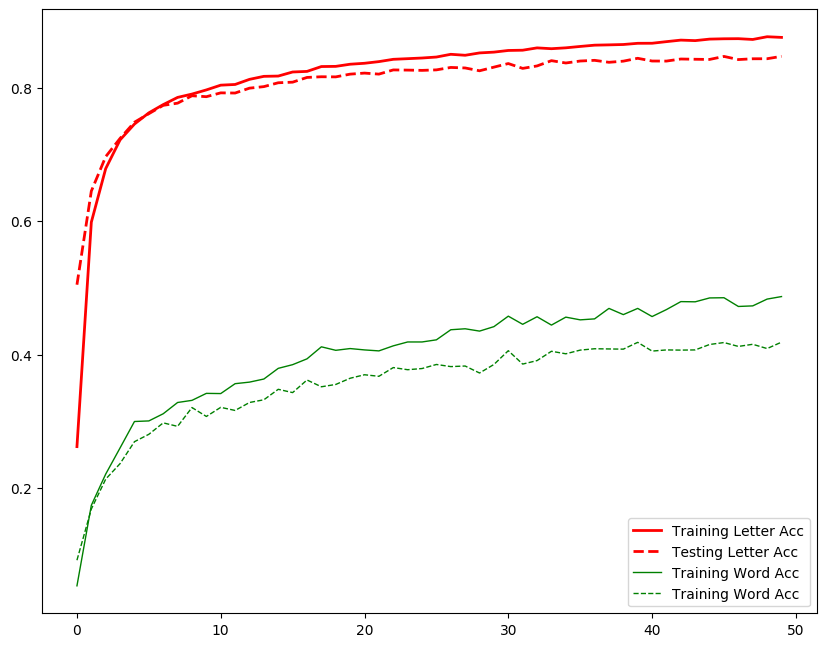

In [118]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
x= [x for x in  range(50)]
y1 = trainingepoc
y2 = testingepoc
y3 = wtrainingepoc
y4 = wtestingepoc

w = 10
h = 8
d = 100
plt.figure(figsize=(w, h), dpi=d)

plt.plot(x, y1, color='red', linewidth=2,  label="Training Letter Acc")
plt.plot(x, y2, color='red', linewidth=2,linestyle='dashed',   label="Testing Letter Acc")
plt.plot(x, y3, color='green', linewidth=1, label="Training Word Acc")
plt.plot(x, y4, color='green', linewidth=1,linestyle='dashed',  label="Training Word Acc")
plt.legend()

plt.savefig("accuracies.png")


In [116]:
max(testingepoc)

tensor(0.8473, dtype=torch.float64)